In [1]:
import pickle
student_dict = pickle.load(open('student.dict', 'rb'))
for k,v in student_dict.items():
    print(k,v)
    break
import pandas as pd
import numpy as np
student_features = pd.read_csv('2016_se1_lib_lms.csv')
student_features.head()
labels = student_features[['MASKED_STUDENT_ID', 'label_atRist']]
id_labels = []
for r in labels.iterrows():
    id_labels.append(str(student_dict[r[1]['MASKED_STUDENT_ID']]) + '\t' + str(r[1]['label_atRist']))

8TMIKVZ5 0


In [2]:
import graphvite as gv
import graphvite.application as gap
import numpy as np
import matplotlib.pyplot as plt
# The following lines are only needed in Jupyter Notebook
from IPython.display import display, Image
%matplotlib inline

In [3]:
import pickle
student_dict = pickle.load(open('student.dict', 'rb'))
for k,v in student_dict.items():
    print(k,v)
    break

8TMIKVZ5 0


In [21]:
# app.node_classification(file_name='student.label')

In [4]:
labels = student_features[['MASKED_STUDENT_ID', 'label_atRist']]

In [8]:
Filename = 'lib_co_occ_Dec.edgelist'

def get_vec_embed(filename):
    app = gap.GraphApplication(dim=128)
    app.load(file_name=filename)
    app.build()
    app.train()
    vertex_embeddings = app.solver.vertex_embeddings
    return vertex_embeddings

nodeset = []
with open(Filename, 'r') as f:
    for line in f.readlines():
        nodeset.append(line.split()[0])
        nodeset.append(line.split()[1])
node_list = list(set(nodeset))
node_list = sorted(node_list)


vertex_embeddings = get_vec_embed(Filename)
with open('student.label', 'w') as f:
    for r in labels.iterrows():
        f.write(str(student_dict[r[1]['MASKED_STUDENT_ID']]) + '\t' + str(r[1]['label_atRist'])+'\n')

nodevec_dict = {}
for i in range(len(node_list)):
    nodevec_dict[node_list[i]] = vertex_embeddings[i]
    
def merge_vec(MASKED_STUDENT_ID):
    try:
        # print(student_dict[MASKED_STUDENT_ID])
        return nodevec_dict[str(student_dict[MASKED_STUDENT_ID])]
    except:
        return 0
labels['dec_embed'] = labels['MASKED_STUDENT_ID'].apply(merge_vec)

[time] GraphApplication.load: 1.30326 s
[time] GraphApplication.build: 0.291874 s
[time] GraphApplication.train: 221.874 s


/home/wenzhy/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
labels.to_csv('dec_embeddings.csv', index=False)

In [62]:
name2id = app.graph.name2id
vertex_embeddings = app.solver.vertex_embeddings
vertex_embeddings.shape
app.save('sept_embeddings.pkl')

In [9]:
app.visualization(Y=labels)

AttributeError: 'GraphApplication' object has no attribute 'visualization'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# The following lines are only needed in Jupyter Notebook
from IPython.display import display, Image
%matplotlib inline

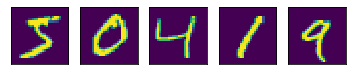

In [8]:
images = gv.dataset.mnist.image_data
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images[i].reshape(28, 28))

In [9]:
app = gap.VisualizationApplication(dim=2)
app.load(vectors=images)
app.build()
app.train()

[time] VisualizationApplication.load: 5.45727 s
[time] VisualizationApplication.build: 0.260628 s
[time] VisualizationApplication.train: 29.3598 s


{}

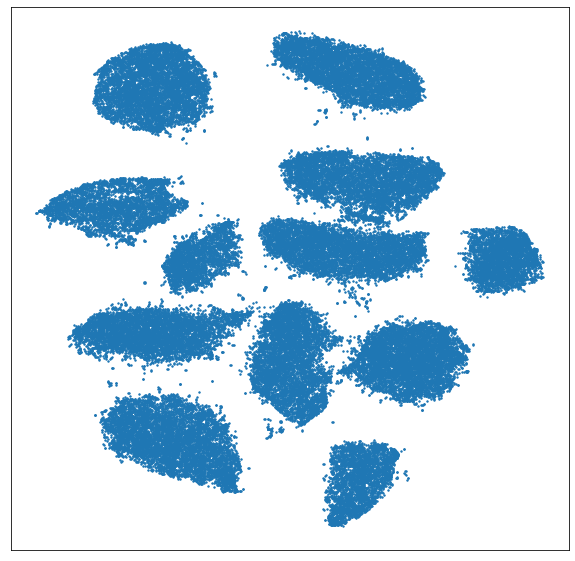

In [10]:
app.visualization()

downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to train-labels-idx1-ubyte.gz
extracting train-labels-idx1-ubyte.gz to train-labels-idx1-ubyte
downloading http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz to t10k-labels-idx1-ubyte.gz
extracting t10k-labels-idx1-ubyte.gz to t10k-labels-idx1-ubyte


{}

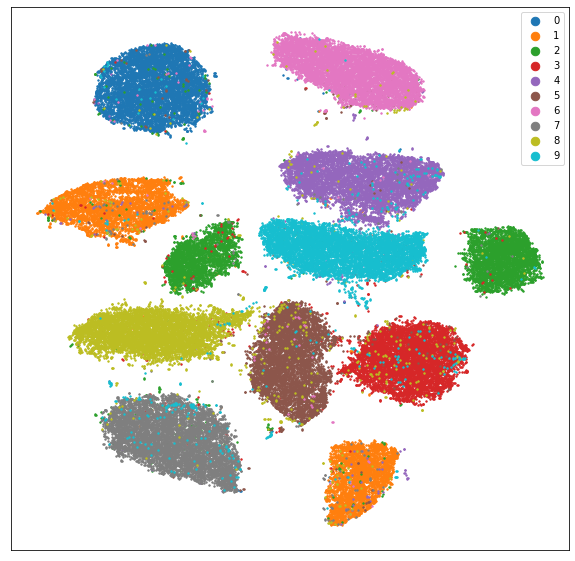

In [11]:
app.visualization(Y=gv.dataset.mnist.label_data)